In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 
import seaborn as sns
plt.style.use('ggplot')

In [235]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [236]:
#features = df.drop(['status','name','MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)'],axis=1)
features = df.drop(['status','name'],axis=1)
target_feature = df.status

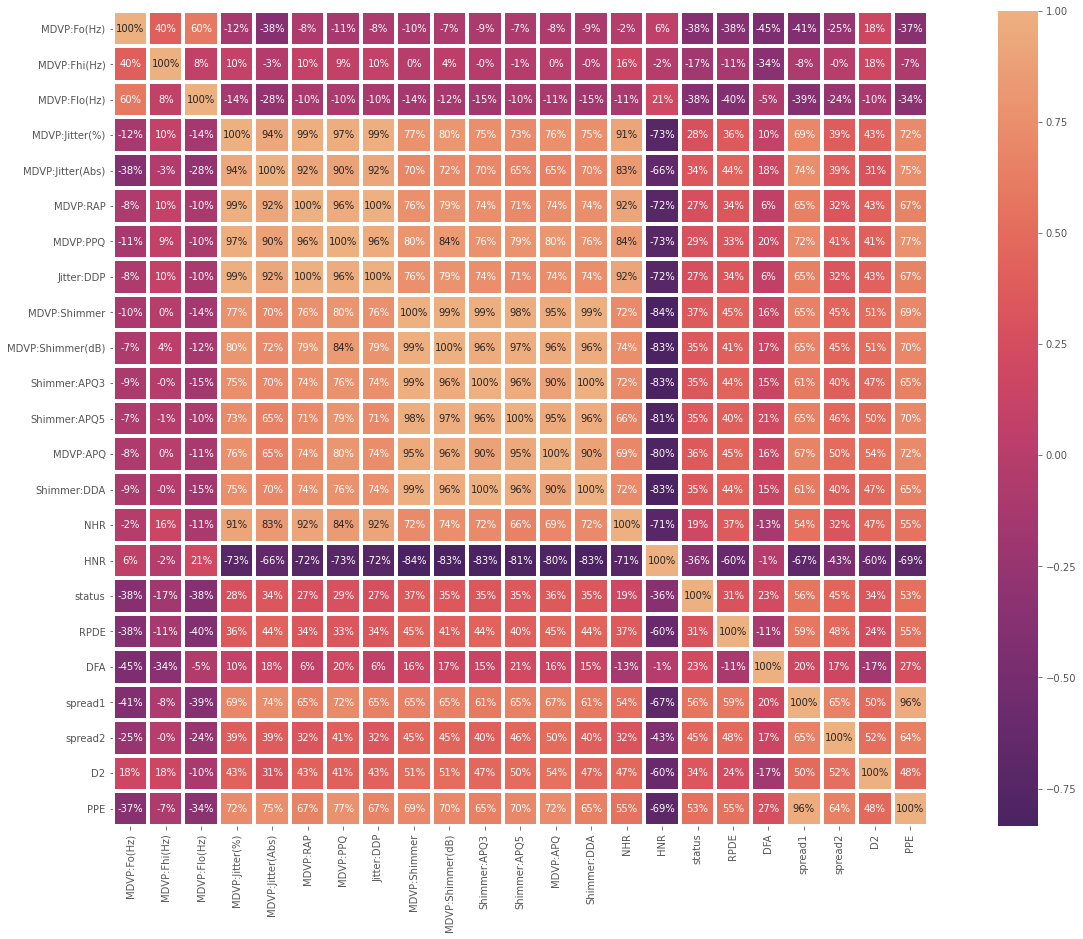

In [244]:
fig = plt.figure(figsize=(25,15))
axis = sns.heatmap(
    data=df.corr(),annot=True,
    linewidths=3,square=True,cmap='flare_r',fmt='.0%'
)

In [238]:
train_X,test_X,train_y,test_y = train_test_split(features,target_feature,train_size=0.7,random_state=0)

In [239]:
cols = ['HNR']
#Columns seemed to not have a correlation with target feature but data has been kept due to it's hgih
#correlation with data in the same axis
#train_X = train_X.drop(cols,axis=1)
#test_X = test_X.drop(cols,axis=1)

In [240]:
scaler = MinMaxScaler((-1,1))
scaler.fit_transform(train_X)
scaler.transform(test_X)

array([[-0.87808257, -0.99934679, -0.74011069, ..., -0.67615973,
        -0.36663381, -0.45017273],
       [-0.43421512, -0.76434878, -0.23411338, ..., -0.34023984,
        -0.37901749, -0.61073923],
       [ 0.32656079, -0.55312369,  0.53180816, ..., -0.22440958,
        -0.87809052, -0.95194148],
       ...,
       [ 0.14526232, -0.55166621, -0.02266815, ...,  0.50368174,
         0.54296354,  0.0643459 ],
       [-0.0886524 , -0.57596987, -0.853853  , ...,  0.72418559,
         0.90347183,  0.06627205],
       [-0.20741448, -0.6437817 , -0.0997224 , ...,  0.50332156,
         0.44032995,  0.1497759 ]])

In [241]:
xgb_model = XGBClassifier(eval_metric='logloss')
optimization_dict = {
    'max_depth':[2,4,6],
    'n_estimators':[5,100,200]
}
model = GridSearchCV(
    xgb_model,optimization_dict,
    scoring='accuracy',verbose=1
)
model.fit(train_X,train_y)
preds = model.predict(test_X)

score = accuracy_score(test_y,preds)
cmatrix = confusion_matrix(test_y,preds)
print(f'Score :{score}\nConfusion Matrix :\n{cmatrix}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/chinmay/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/chinmay/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/chinmay/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWa

/home/chinmay/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/chinmay/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/chinmay/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWa

Score :0.9491525423728814
Confusion Matrix :
[[12  1]
 [ 2 44]]


/home/chinmay/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/chinmay/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/chinmay/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWa

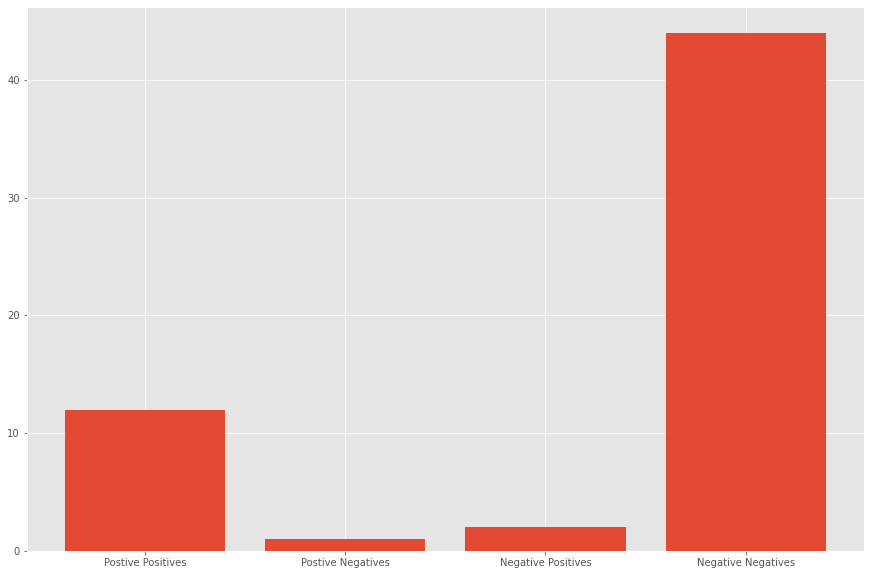

In [246]:
names = ['Postive Positives','Postive Negatives','Negative Positives','Negative Negatives']
figure = plt.figure(figsize=(15,10))
cmatrix = cmatrix.reshape(1,4)
plt.bar(names,cmatrix[0])
plt.show()